<a href="https://colab.research.google.com/github/roy392/Market-Basket-Analysis/blob/master/tugas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Market** Basket Analysis in Python

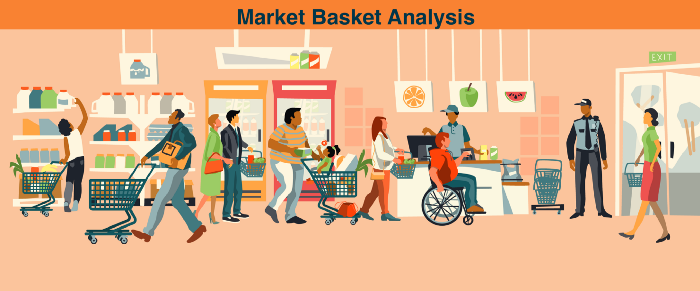
Amazon, Netflix and many other popular companies rely on Market Basket Analysis to produce meaningful product recommendations. Market Basket Analysis is a powerful tool for translating vast amounts of customer transaction and viewing data into simple rules for product promotion and recommendation. In this notebook, we’ll learn how to perform Market Basket Analysis using the Apriori algorithm, standard and custom metrics, association rules, aggregation and pruning, and visualization.

What is market basket analysis?
Identify products frequently purchased together.
Bookstore Ex:
Biography and history
Fiction and poetry
Construct recommendations based on these
Bookstore Ex:
Place biography and history sections together.
Keep fiction and history apart
The use cases of market basket analysis
Build Netflix-style recommendations engine.
Improve product recommendations on an e-commerce store.
Cross-sell products in a retail setting.
Improve inventory management.
Upsell products.
Market basket analysis
Construct association rules
Identify items frequently purchased together
Association rules


#Keuntungan Analisis Keranjang Pasar
Ada banyak keuntungan menerapkan Analisis Keranjang Pasar dalam pemasaran. Market basket Analysis (MBA) dapat diterapkan pada data pelanggan dari sistem point of sale ( PoS ).

#Ini membantu pengecer dengan:

*  Meningkatkan keterlibatan pelanggan
*  Meningkatkan penjualan dan meningkatkan RoI
* Meningkatkan pengalaman pelanggan
*  Optimalkan strategi pemasaran dan kampanye
* 
Membantu untuk memahami pelanggan lebih baik
*  Mengidentifikasi perilaku dan pola pelanggan










In [111]:
import numpy as np
import pandas as pd

# do wizualizacji
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import squarify
# do analizy koszyka rynkowego
from mlxtend.frequent_patterns import apriori
from apyori import apriori
from mlxtend.frequent_patterns import association_rules


In [112]:
!pip install squarify
!pip install apyori

In [113]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Setelah kita membaca dataset secara lengkap, kita diharuskan untuk mendapatkan daftar item dalam setiap transaksi. Jadi kita akan menjalankan dua loop. Satu untuk jumlah total transaksi, dan yang lainnya untuk jumlah total kolom dalam setiap transaksi. Daftar tersebut akan berfungsi sebagai set pelatihan dari mana kita dapat menghasilkan daftar Aturan Asosiasi.

In [115]:
l=[]
for i in range(1,7501):
    l.append([str(data.values[i,j]) for j in range(0,20)])
    

Jadi kami siap dengan daftar item dalam set pelatihan kami, maka kami perlu menjalankan algoritma apriori yang akan mempelajari daftar aturan asosiasi dari set pelatihan yaitu daftar. Jadi, dukungan minimum di sini adalah 0,0045 yang diambil di sini sebagai dukungan. Sekarang mari kita lihat bahwa kita telah mempertahankan 0,2 sebagai kepercayaan min. Lift minimum =3 diambil dan panjang minimum dianggap sebagai 2 karena kita harus menemukan asosiasi di antara minimal dua item.

In [116]:
association_rules = apriori(l, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

Setelah menjalankan baris kode di atas, kita telah membuat daftar aturan asosiasi antar item. Jadi untuk melihat aturan ini, baris kode di bawah ini perlu dijalankan.

In [117]:

for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'chicken', 'light cream'})
frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'pasta', 'escalope'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'tomato sauce', 'ground beef'})
frozenset({'whole wheat pasta', 'olive oil'})
frozenset({'shrimp', 'pasta'})
frozenset({'chicken', 'nan', 'light cream'})
frozenset({'frozen vegetables', 'chocolate', 'shrimp'})
frozenset({'cooking oil', 'ground beef', 'spaghetti'})
frozenset({'nan', 'mushroom cream sauce', 'escalope'})
frozenset({'nan', 'pasta', 'escalope'})
frozenset({'frozen vegetables', 'ground beef', 'spaghetti'})
frozenset({'frozen vegetables', 'milk', 'olive oil'})
frozenset({'frozen vegetables', 'shrimp', 'mineral water'})
frozenset({'frozen vegetables', 'spaghetti', 'olive oil'})
frozenset({'frozen vegetables', 'shrimp', 'spaghetti'})
frozenset({'frozen vegetables', 'tomatoes', 'spaghetti'})
frozenset({'grated cheese', 'ground beef', 'spaghetti'})
frozenset({'herb & pepper', 'ground beef', 'mineral water'})


Di sini kita akan menampilkan Rule, Support, dan rasio angkat untuk setiap aturan asosiasi di atas dengan menggunakan for loop.

In [118]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    # second index of the inner list
    print("Support: " + str(item[1]))
    # third index of the list located at 0th position
    # of the third index of the inner list
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("-----------------------------------------------------")

Rule: chicken -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
-----------------------------------------------------
Rule: mushroom cream sauce -> escalope
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
-----------------------------------------------------
Rule: pasta -> escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
-----------------------------------------------------
Rule: herb & pepper -> ground beef
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
-----------------------------------------------------
Rule: tomato sauce -> ground beef
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
-----------------------------------------------------
Rule: whole wheat pasta -> olive oil
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
-----------------------------------------------

kita bisa melihat data berapa rule,support,confidence,dan lift pada masing masing barang pembelian

Setelah kita membaca dataset, kita perlu mendapatkan daftar item dalam setiap transaksi. JADI kita akan menjalankan dua loop di sini. Satu untuk jumlah total transaksi, dan lainnya untuk jumlah total kolom dalam setiap transaksi. Daftar ini akan berfungsi sebagai set pelatihan dari mana kita dapat menghasilkan daftar aturan asosiasi.

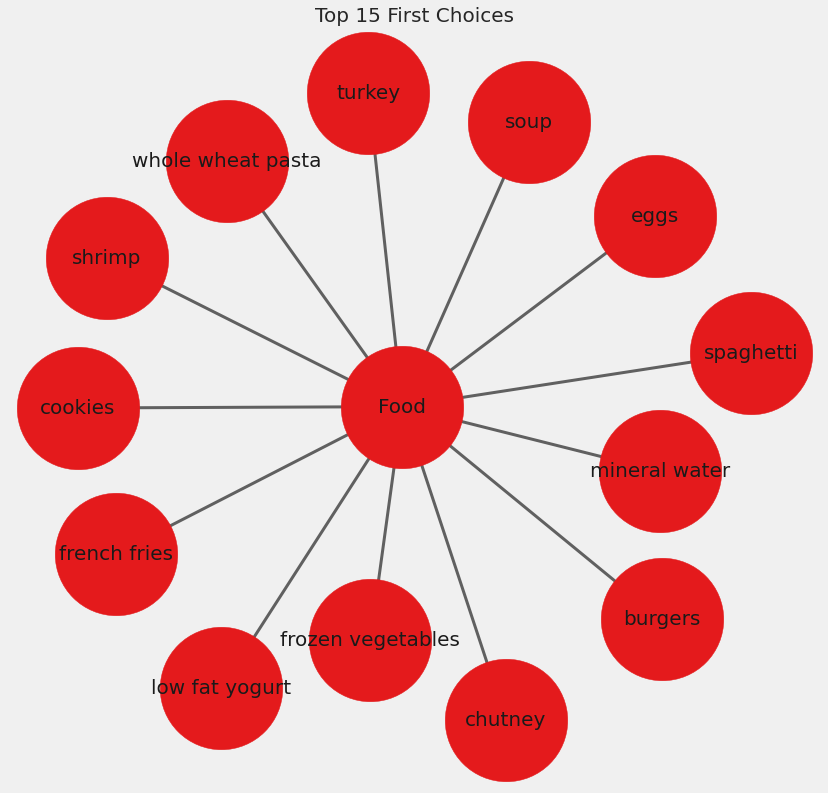

In [119]:
import networkx as nx
data['food'] = 'Food'
food = data.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(food, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

#memilih aturan
Menemukan aturan yang berguna itu sulit.
Set dari semua aturan yang mungkin adalah besar.
Kebanyakan aturan tidak berguna.
Harus membuang sebagian besar aturan.
Bagaimana jika kita membatasi diri pada aturan sederhana?
Satu anteseden dan satu konsekuen.
Masih menantang, bahkan untuk dataset kecil.

In [120]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))


In [121]:
print('# of items:',len(items))
print(list(items))

# of items: 122
['tomato sauce', 'nan', 'yogurt cake', 'whole wheat pasta', 'chicken', 'fromage blanc', 'white wine', 'oatmeal', 'mushroom cream sauce', 'pet food', 'cereals', 'low fat yogurt', 'eggs', 'red wine', 'bacon', 'mayonnaise', 'magazines', 'sandwich', 'cooking oil', 'green beans', 'pancakes', 'avocado', 'chocolate', 'toothpaste', 'soda', 'Food', 'dessert wine', 'gums', 'tomato juice', 'grated cheese', 'green tea', 'soup', 'salt', 'rice', 'sparkling water', 'zucchini', 'green grapes', 'cookies', 'nonfat milk', 'black tea', 'candy bars', 'pickles', 'mint', 'cottage cheese', 'mashed potato', 'tomatoes', 'almonds', 'bug spray', 'honey', 'mineral water', 'frozen vegetables', 'brownies', 'cider', 'ketchup', 'light cream', 'olive oil', 'flax seed', 'eggplant', 'hand protein bar', 'milk', 'salmon', 'escalope', 'yams', 'champagne', 'ground beef', 'spaghetti', 'antioxydant juice', 'shallot', 'bramble', 'mint green tea', 'spinach', 'ham', 'salad', 'carrots', 'oil', 'cauliflower', 'cream

In [122]:
if 'nan' in items: items.remove('nan')
print(list(items))

['tomato sauce', 'yogurt cake', 'whole wheat pasta', 'chicken', 'fromage blanc', 'white wine', 'oatmeal', 'mushroom cream sauce', 'pet food', 'cereals', 'low fat yogurt', 'eggs', 'red wine', 'bacon', 'mayonnaise', 'magazines', 'sandwich', 'cooking oil', 'green beans', 'pancakes', 'avocado', 'chocolate', 'toothpaste', 'soda', 'Food', 'dessert wine', 'gums', 'tomato juice', 'grated cheese', 'green tea', 'soup', 'salt', 'rice', 'sparkling water', 'zucchini', 'green grapes', 'cookies', 'nonfat milk', 'black tea', 'candy bars', 'pickles', 'mint', 'cottage cheese', 'mashed potato', 'tomatoes', 'almonds', 'bug spray', 'honey', 'mineral water', 'frozen vegetables', 'brownies', 'cider', 'ketchup', 'light cream', 'olive oil', 'flax seed', 'eggplant', 'hand protein bar', 'milk', 'salmon', 'escalope', 'yams', 'champagne', 'ground beef', 'spaghetti', 'antioxydant juice', 'shallot', 'bramble', 'mint green tea', 'spinach', 'ham', 'salad', 'carrots', 'oil', 'cauliflower', 'cream', 'meatballs', 'melons

Sepanjang kami akan menggunakan saluran umum untuk data pra-pemrosesan untuk digunakan dalam analisis keranjang pasar. Langkah pertama adalah mengimpor pandas DataFrame dan pilih kolom yang berisi transaksi. Setiap transaksi di kolom akan menjadi string yang terdiri dari sejumlah item, masing-masing dipisahkan oleh koma. Langkah selanjutnya adalah menggunakan fungsi lambda untuk membagi setiap string transaksi ke dalam daftar, sehingga mengubah kolom menjadi daftar daftar. Kemudian kita akan mengubah transaksi tersebut menjadi DataFrame yang dikodekan secara one-hot, di mana setiap kolom terdiri dari nilai TRUE dan FALSE yang menunjukkan apakah suatu item disertakan dalam suatu transaksi.

In [123]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()


,asparagus,Food,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,...,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


pemangkasan
Metrik adalah ukuran kinerja untuk aturan.
{humor} 
0,81
{fiksi} → {perjalanan}
0,23
Pemangkasan adalah penggunaan metrik untuk membuang aturan.
Pertahankan: {humor} → 
Buang: { ction} → 
Metrik paling 
Metrik dukungan mengukur bagian transaksi yang berisi itemset.
jumlah transaksi dengan itemjumlah transaksi

In [124]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
Food,1.000000
mineral water,0.161333
eggs,0.142533
french fries,0.138400
spaghetti,0.126933


In [125]:
support.describe()

,support
count,121.000000
mean,0.032332
std,0.094150
min,0.000133
25%,0.005867
50%,0.011867
75%,0.028133
max,1.000000
